<a href="https://colab.research.google.com/github/hidayattaufiqur/Tubes-Statistika/blob/main/Tubes_Statistika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas Besar Statistika**

### **Anggota Kelompok**: 

1. Ahmad Adeska (1301204420)
2. Azzahra Kamila Linanda (1301204275)
3. Addin Amanatulloh Suparjo (130120428)
4. Hidayat Taufiqur Rahmah Achmad (1301204300)



### **Deskripsi**:

Kita memiliki dataset yang bersumber dari https://www.kaggle.com/sakshigoyal7/credit-card-customers yang berisi kumpulan data pelanggan kartu kredit sebuah bank. Manajer dari bank tersebut ingin memprediksi *churn rate* dari dataset yang ada sehingga pihak bank dapat mencegah pelanggan berhenti berlangganan.


### **Tujuan**:

Tujuan dari tugas besar ini adalah untuk menganalisa dan mengolah dataset tersebut dan menyelesaikan masalah yang ada dengan menggunakan metode yang telah dipelajari.




 ## **Collect and Organize Data**






In [ ]:
# Install dan load package
install.packages("pacman")
pacman::p_load(pacman, dplyr, ggplot2, GGally, skimr, tidyverse, gridExtra, hrbrthemes, RColorBrewer, viridis, plotly, heatmaply, corrplot, ggcorrplot, reshape2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



>Disini kita menginstall dan memuat packages yang akan digunakan.

In [ ]:
# Meng-import dan meng-assign dataset ke variabel "df"
df <- read.csv('https://raw.githubusercontent.com/hidayattaufiqur/Tubes-Statistika/main/BankChurners.csv')

>Dataset di import lalu di assign ke variabel *df*.

In [ ]:
# Menampilkan atribut dataset
str(df)

'data.frame':	10127 obs. of  23 variables:
 $ CLIENTNUM                                                                                                                         : int  768805383 818770008 713982108 769911858 709106358 713061558 810347208 818906208 710930508 719661558 ...
 $ Attrition_Flag                                                                                                                    : chr  "Existing Customer" "Existing Customer" "Existing Customer" "Existing Customer" ...
 $ Customer_Age                                                                                                                      : int  45 49 51 40 40 44 51 32 37 48 ...
 $ Gender                                                                                                                            : chr  "M" "F" "M" "F" ...
 $ Dependent_count                                                                                                                   : int  3 5 3 4 3 2 4 0

>Menampilkan atribut yang ada di dataset, dapat dilihat juga bahwa dataset memuat total 10.127 baris data dan 23 atribut data.

## **Wrangle Data**

In [ ]:
# Mendeteksi missing value
sum(is.na(df)) 

[1] 0

>Mengecek jumlah data NA dalam tiap atribut,
> dari output yang terlihat dataset sudah bersih sehingga tidak perlu dilakukan pembersihan data NA.

In [ ]:
# Menghapus attribut yang tidak dibutuhkan
df <- df [-c(1, 5, 8, 11:13, 16:17, 20:23)]

> Menghapus atribut yang tidak dibutuhkan berdasarkan index tiap atribut.



In [ ]:
# Mengubah tipe data "chr" ke "factor"
df <- df %>% mutate_if(is.character, as.factor)

> Mengubah tipe data *chr* ke tipe data *factor*.

In [ ]:
# Menampilkan detail dataset setelah dataset dibersihkan
str(df)

'data.frame':	10127 obs. of  11 variables:
 $ Attrition_Flag     : Factor w/ 2 levels "Attrited Customer",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Customer_Age       : int  45 49 51 40 40 44 51 32 37 48 ...
 $ Gender             : Factor w/ 2 levels "F","M": 2 1 2 1 2 2 2 2 2 2 ...
 $ Education_Level    : Factor w/ 7 levels "College","Doctorate",..: 4 3 3 4 6 3 7 4 6 3 ...
 $ Marital_Status     : Factor w/ 4 levels "Divorced","Married",..: 2 3 2 4 2 2 2 4 3 3 ...
 $ Card_Category      : Factor w/ 4 levels "Blue","Gold",..: 1 1 1 1 1 1 2 4 1 1 ...
 $ Months_on_book     : int  39 44 36 34 21 36 46 27 36 36 ...
 $ Credit_Limit       : num  12691 8256 3418 3313 4716 ...
 $ Total_Revolving_Bal: int  777 864 0 2517 0 1247 2264 1396 2517 1677 ...
 $ Total_Trans_Amt    : int  1144 1291 1887 1171 816 1088 1330 1538 1350 1441 ...
 $ Total_Trans_Ct     : int  42 33 20 20 28 24 31 36 24 32 ...


> Setelah melakukan pembersihan dataset, sekarang kita hanya memiliki 11 total atribut.

## **Explore, Visualize, Analyze Data**



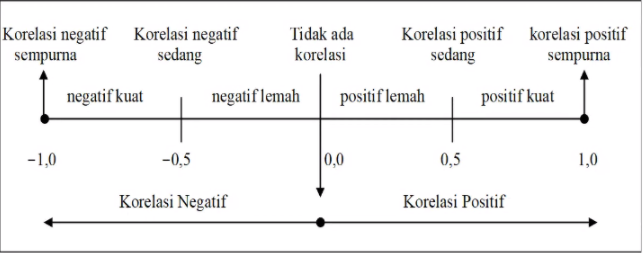

### Atribut categorical 


Attrited Customer Existing Customer 
         16.06596          83.93404 

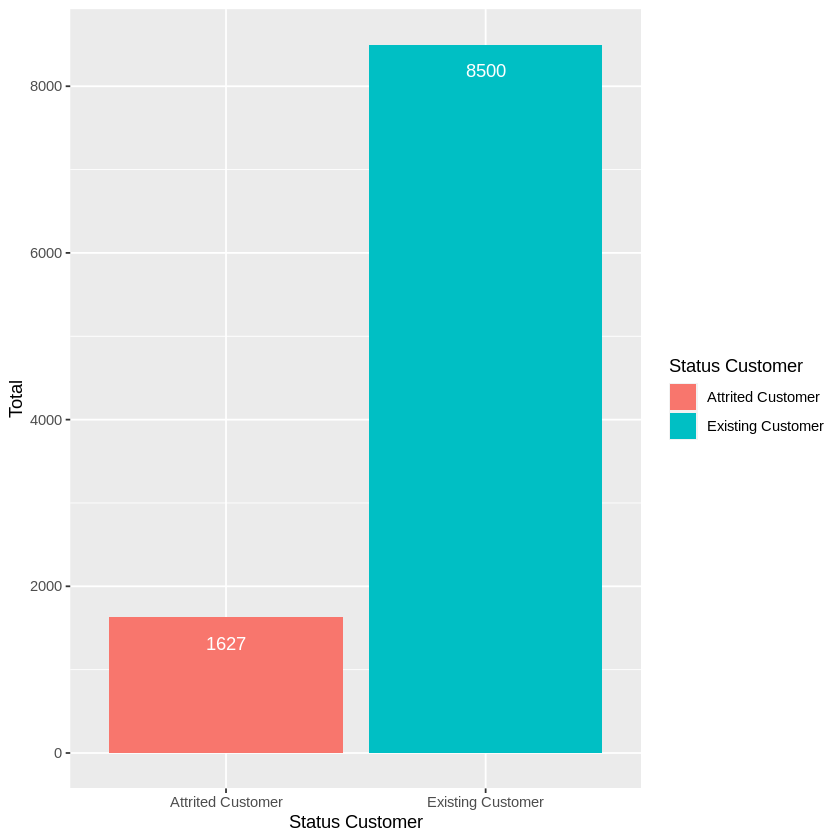

In [ ]:
# Menampilkan barplot dari atribut attrition_flag
count_data <- df %>%
  count(Attrition_Flag)
ggplot(count_data, aes(x = Attrition_Flag, y = n)) +
    geom_bar(aes(fill = Attrition_Flag), stat = "identity") +
    geom_text(aes(label = n), vjust = 2.5, col = "white") +
    labs(x="Status Customer", y="Total", fill="Status Customer")

# Menampikan detail presentase atribut attrition_flag 
table_one <- (table(df$Attrition_Flag))
precentage <- prop.table(table_one) * 100
precentage

> **Barplot dari atribut status customer**
> 
> Tujuan dari barplot ini adalah untuk melihat berapa banyak customer yang masih berlangganan dan yang sudah berhenti berlangganan serta presentasenya. 
> Dari hasil analisa barplot diatas, kita dapat melihat 2 hal:
> 1. Total customer yang masih berlangganan adalah 8500 orang atau sekitar 84%
> 2. Total customer yang sudah berhenti berlangganan adalah 1627 orang atau sekitar 16%

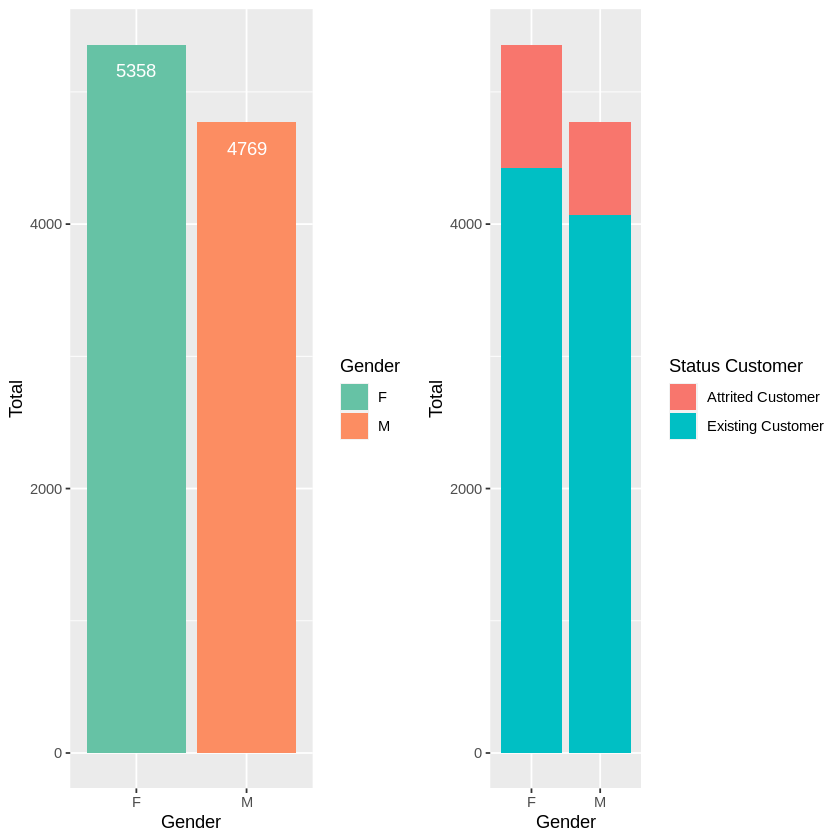

In [ ]:
# Menghitung total dari tiap data dalam atribut gender
count_data <- df %>%
  count(Gender)
# Membuat barplot sebelah kiri
g1 <- ggplot(count_data, aes(x = Gender, y = n)) +
    geom_bar(aes(fill = Gender), stat = "identity") +
    geom_text(aes(label = n), vjust = 2.5, col = "white") +
    scale_fill_brewer(palette="Set2")+
    labs(x="Gender", y="Total", fill="Gender")
# Membuat barplot sebelah kanan
g2 <- ggplot(df, aes(x = Gender, fill = Attrition_Flag)) +
        geom_bar() +
        labs(x="Gender", y="Total", fill="Status Customer")
# Menampilkan kedua barplot bersampingan
gridExtra::grid.arrange(g1, g2, nrow = 1)

In [ ]:
# Menampilkan detail presentase atribut gender
table_one <- (table(df$Gender))
precentage <- prop.table(table_one) * 100
precentage
# Mencari korelasi dari atribut gender dan status customer
cor.test(as.numeric(df$Attrition_Flag), as.numeric(df$Gender))


       F        M 
52.90807 47.09193 


	Pearson's product-moment correlation

data:  as.numeric(df$Attrition_Flag) and as.numeric(df$Gender)
t = 3.753, df = 10125, p-value = 0.0001757
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.01780785 0.05670731
sample estimates:
      cor 
0.0372717 


> **Barplot dari gender dan status customer**
> 
> Dari hasil analisa barplot diatas, kita dapat melihat bahwa:
> 1. Lebih banyak perempuan yang berhenti berlangganan dibanding laki-laki (53% vs 47%)
> 2. Nilai korelasi antar dua atribut adalah 0.03 
> 3. Nilai p-value lebih kecil dari 0.05, sehingga kita menolak *null hypothesis* bahwa atribut gender dan status customer tidak memiliki korelasi
> 
> **Kesimpulan**: Terdapat korelasi positif lemah dari kedua atribut

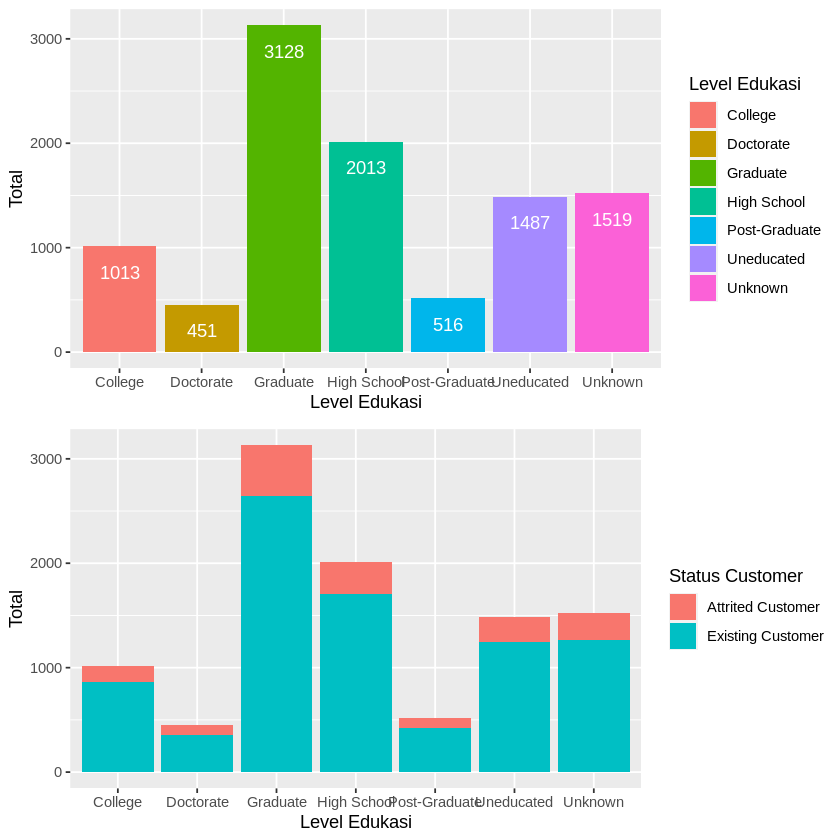

In [ ]:
# Menghitung jumlah atribut level edukasi
count_data <- df %>%
  count(Education_Level)
# Membuat barplot 
g1 <- ggplot(count_data, aes(x = Education_Level, y = n)) +
      geom_bar(aes(fill = Education_Level), stat = "identity") +
      geom_text(aes(label = n), vjust = 2.5, col = "white") +
      labs(x="Level Edukasi", y="Total", fill="Level Edukasi")
g2 <- ggplot(df, aes(x = Education_Level, fill = Attrition_Flag)) +
        geom_bar() +
        # geom_text(aes(label = n), vjust = 2.5, col = "white") +
        labs(x="Level Edukasi", y="Total", fill="Status Customer")

gridExtra::grid.arrange(g1, g2, nrow = 2)


In [ ]:
# Menampilkan detail presentase atribut level edukasi
table_one <- (table(df$Education_Level))
precentage <- prop.table(table_one) * 100
precentage
# Mencari korelasi dari level edukasi dan status customer
cor.test(as.numeric(df$Attrition_Flag), as.numeric(df$Education_Level))


      College     Doctorate      Graduate   High School Post-Graduate 
    10.002962      4.453441     30.887726     19.877555      5.095290 
   Uneducated       Unknown 
    14.683519     14.999506 


	Pearson's product-moment correlation

data:  as.numeric(df$Attrition_Flag) and as.numeric(df$Education_Level)
t = -0.55858, df = 10125, p-value = 0.5765
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.02502516  0.01392720
sample estimates:
         cor 
-0.005551085 


> **Barplot dari level edukasi dan status customer**
> 
> Dari hasil analisa barplot diatas, kita dapat melihat bahwa:
> 1. Presentase customer paling besar berasal dari level edukasi *doctorate* (31%)
> 2. Nilai korelasi antar dua atribut adalah -0.005
> 3. Nilai p-value lebih besar dari 0.05, sehingga kita gagal menolak *null hypothesis* bahwa atribut level edukasi dan status customer tidak memiliki korelasi
> 
> **Kesimpulan**: Tidak terdapat korelasi antara kedua atribut 

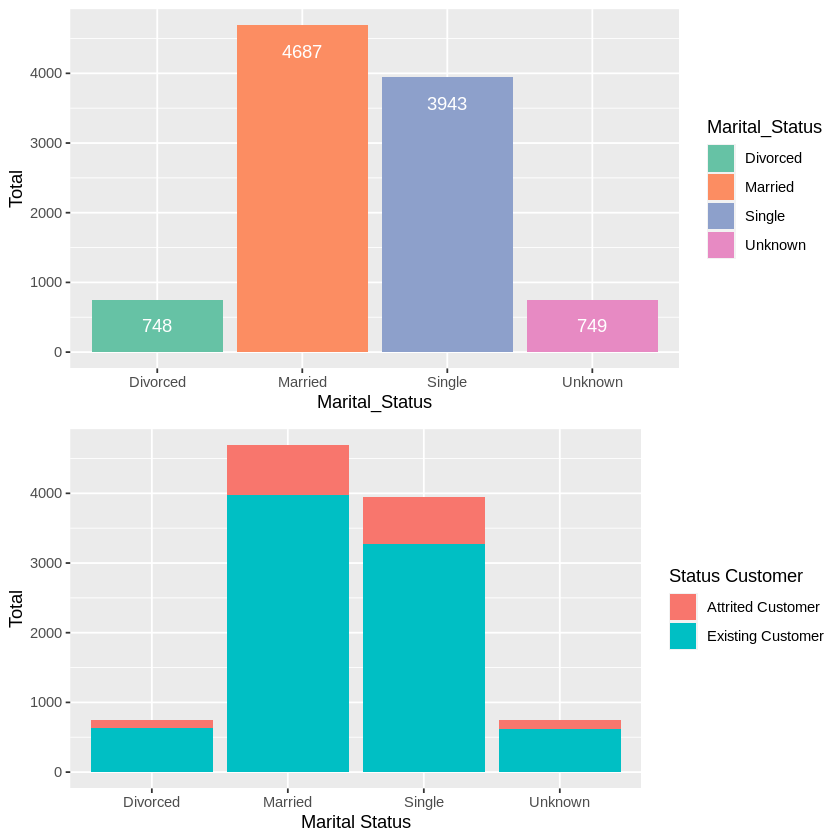

In [ ]:
# Menghitung total atribut status pernikahan
count_data <- df %>%
  count(Marital_Status)
# Membuat barplot
g1 <- ggplot(count_data, aes(x = Marital_Status, y = n)) +
      geom_bar(aes(fill = Marital_Status), stat = "identity") +
      geom_text(aes(label = n), vjust = 2.5, col = "white") +
      scale_fill_brewer(palette="Set2")+
      labs(x="Marital_Status", y="Total", fill="Marital_Status")
g2 <- # Membuat barplot
      ggplot(df, aes(x = Marital_Status, fill = Attrition_Flag)) +
      geom_bar() +
      # geom_text(aes(label = n), vjust = 2.5, col = "white") +
      labs(x="Marital Status", y="Total", fill="Status Customer")

gridExtra::grid.arrange(g1, g2, nrow = 2)


In [ ]:
# Menampilkan detail presentase atribut status pernikahan
table_one <- (table(df$Marital_Status))
precentage <- prop.table(table_one) * 100
precentage
# Mencari korelasi dari atribut status pernikahan dan status customer
cor.test(as.numeric(df$Attrition_Flag), as.numeric(df$Marital_Status))


 Divorced   Married    Single   Unknown 
 7.386195 46.282216 38.935519  7.396070 


	Pearson's product-moment correlation

data:  as.numeric(df$Attrition_Flag) and as.numeric(df$Marital_Status)
t = -1.8717, df = 10125, p-value = 0.06128
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.038060411  0.000879676
sample estimates:
        cor 
-0.01859742 


> **Barplot dari status pernikahan dan status customer**
> 
> Dari hasil analisa barplot diatas, kita dapat melihat bahwa:
> 1. Presentase customer paling besar berasal dari status pernikahan *married* (46%)
> 2. Nilai korelasi antar dua atribut adalah -0.02
> 3. Nilai p-value lebih besar dari 0.05, sehingga kita gagal menolak *null hypothesis* bahwa atribut status pernikahan dan status customer tidak memiliki korelasi
> 
> **Kesimpulan**: Tidak terdapat korelasi antara kedua atribut 

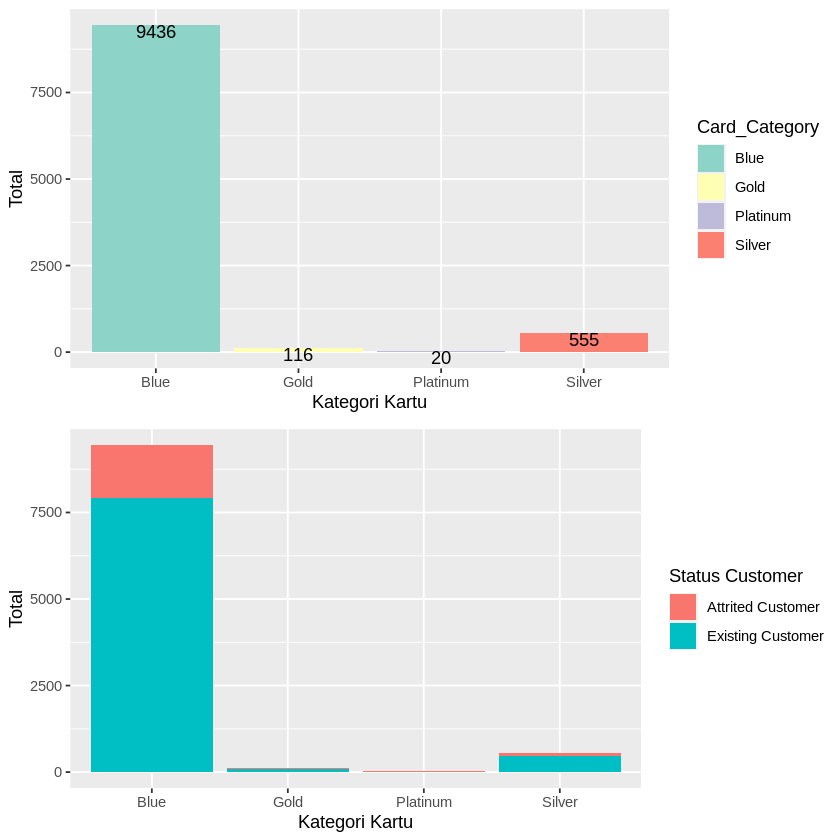

In [ ]:
# Menghitung jumlah atribut kategori kartu
count_data <- df %>%
  count(Card_Category)
# Membuat barplot
g1 <- ggplot(count_data, aes(x = Card_Category, y = n)) +
      geom_bar(aes(fill = Card_Category), stat = "identity") +
      geom_text(aes(label = n), vjust = 1, col = "black") +
      scale_fill_brewer(palette="Set3")+
      labs(x="Kategori Kartu", y="Total", fill="Card_Category")
g2 <- # Membuat barplot
ggplot(df, aes(x = Card_Category, fill = Attrition_Flag)) +
       geom_bar() +
      # geom_text(aes(label = n), vjust = 2.5, col = "white") +
      labs(x="Kategori Kartu", y="Total", fill="Status Customer")

gridExtra::grid.arrange(g1, g2, nrow = 2)

In [ ]:
# Menampilkan detail presentase atribut kategori kartu
table_one <- (table(df$Card_Category))
precentage <- prop.table(table_one) * 100
precentage
# Mencari korelasi dari atribut kategori kartu dan status customer
cor.test(as.numeric(df$Attrition_Flag), as.numeric(df$Card_Category))


      Blue       Gold   Platinum     Silver 
93.1766565  1.1454528  0.1974919  5.4803989 


	Pearson's product-moment correlation

data:  as.numeric(df$Attrition_Flag) and as.numeric(df$Card_Category)
t = 0.60759, df = 10125, p-value = 0.5435
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.01344023  0.02551191
sample estimates:
        cor 
0.006038132 


> **Barplot dari kategori kartu dan status customer**
> 
> Dari hasil analisa barplot diatas, kita dapat melihat bahwa:
> 1. Presentase customer paling besar berasal dari kategori kartu *blue* (93%)
> 2. Nilai korelasi antar dua atribut adalah 0.006
> 3. Nilai p-value lebih besar dari 0.05, sehingga kita gagal menolak *null hypothesis* bahwa atribut kategori kartu dan status customer tidak memiliki korelasi
> 
> **Kesimpulan**: Tidak terdapat korelasi antara kedua atribut 

### Umur Customer dan Status Customer

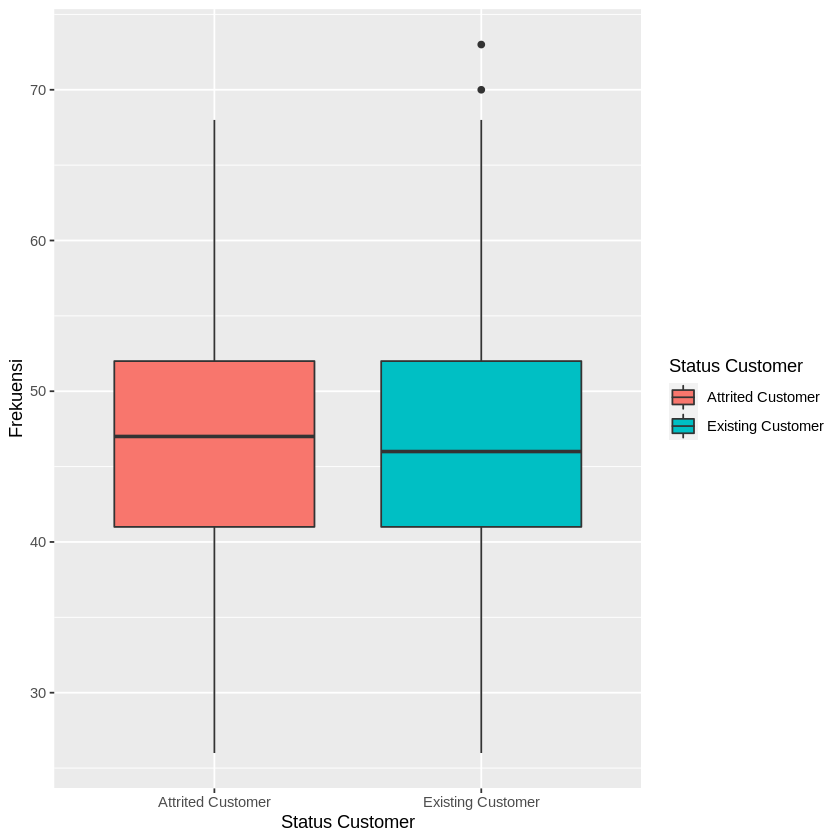

In [ ]:
# Membuat boxplot
ggplot(df, aes(x = Attrition_Flag, y = Customer_Age, fill=Attrition_Flag)) +
      geom_boxplot() +
      # labs(x="Status Customer", y="Frekuensi", fill="Gender")
      xlab("Status Customer") +
      labs(x="Status Customer", y="Frekuensi", fill="Status Customer")


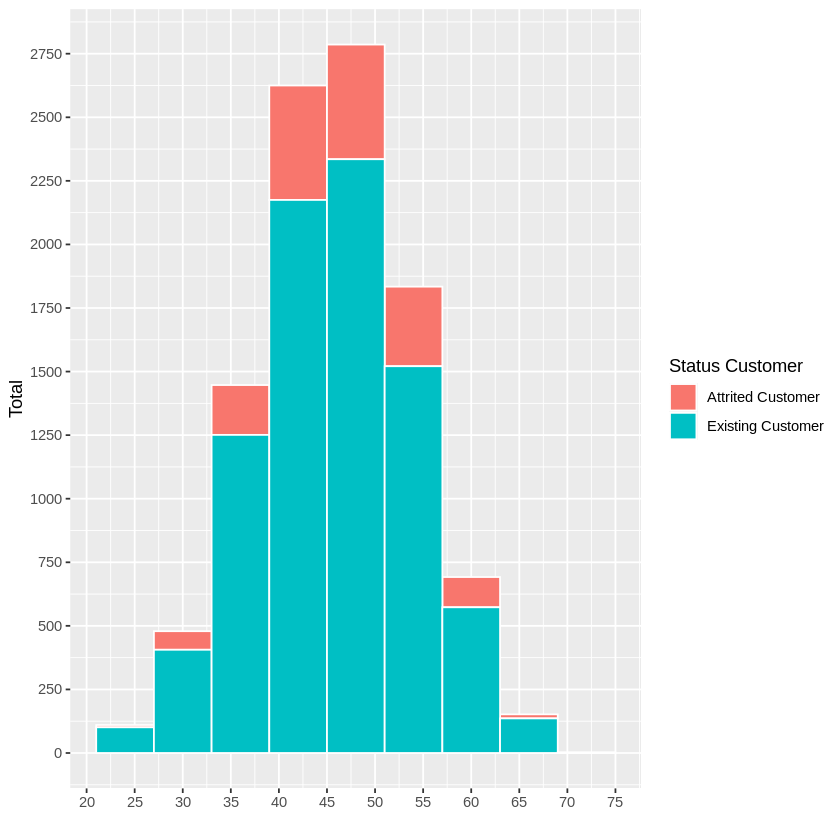

In [ ]:
# Membuat barplot 
ggplot(df, aes(x = Customer_Age, fill = Attrition_Flag)) +
      geom_histogram(aes(fill = Attrition_Flag), binwidth = 6, col = "white") +
      scale_y_continuous(breaks = seq(0,3000,by=250)) +
      scale_x_continuous(breaks = seq(0,75,by=5)) +
      labs(x="", y="Total", fill="Status Customer")

In [ ]:
# Menampilkan summary dari atribut umur customer
summary(df$Customer_Age)
# Mencari korelasi dari atribut umur dan status customer
cor.test(as.numeric(df$Attrition_Flag), df$Customer_Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  26.00   41.00   46.00   46.33   52.00   73.00 


	Pearson's product-moment correlation

data:  as.numeric(df$Attrition_Flag) and df$Customer_Age
t = -1.832, df = 10125, p-value = 0.06699
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.03766656  0.00127409
sample estimates:
        cor 
-0.01820314 


> **Boxplot dan barplot dari atribut umur dan status customer**
>  
> Dari hasil analisa diatas, kita dapat melihat:
> 1. Rata-rata umur customer adalah 46.33 tahun, minimal umur adalah 26 tahun, dan maksimal umur adalah 73 tahun
> 2. Umur 40an hingga 50an adalah jumlah yang paling banyak berhenti berlangganan
> 3. Nilai korelasi antara dua atribut adalah -0.018
> 4. Nilai p-value lebih besar dari 0.05, sehingga kita gagal menolak *null hypothesis* bahwa atribut umur customer dan status customer tidak memiliki korelasi
> 
> **Kesimpulan**: Tidak terdapat korelasi antara kedua atribut

### Total Banyak Transaksi dan Status Customer 

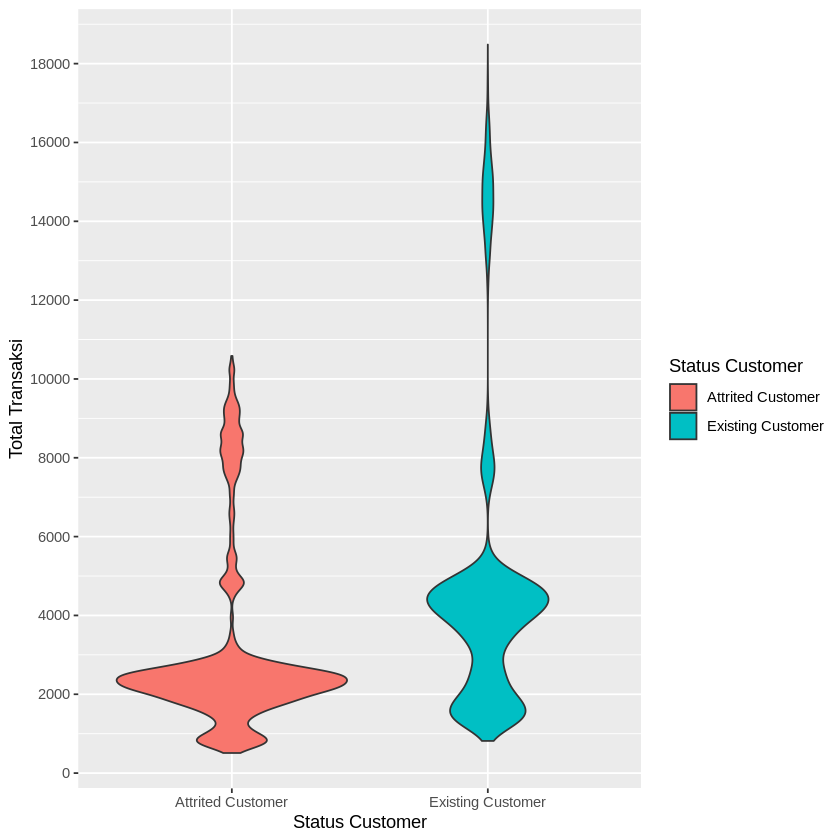

In [ ]:
# Membuat violin plot
ggplot(data = df, aes(x = Attrition_Flag, y = Total_Trans_Amt, fill=Attrition_Flag)) +
    geom_violin() +
    xlab("Status Customer") + 
    scale_y_continuous(breaks = seq(0,20000,by=2000)) +
    labs(x="Status Customer", y="Total Transaksi", fill="Status Customer") 

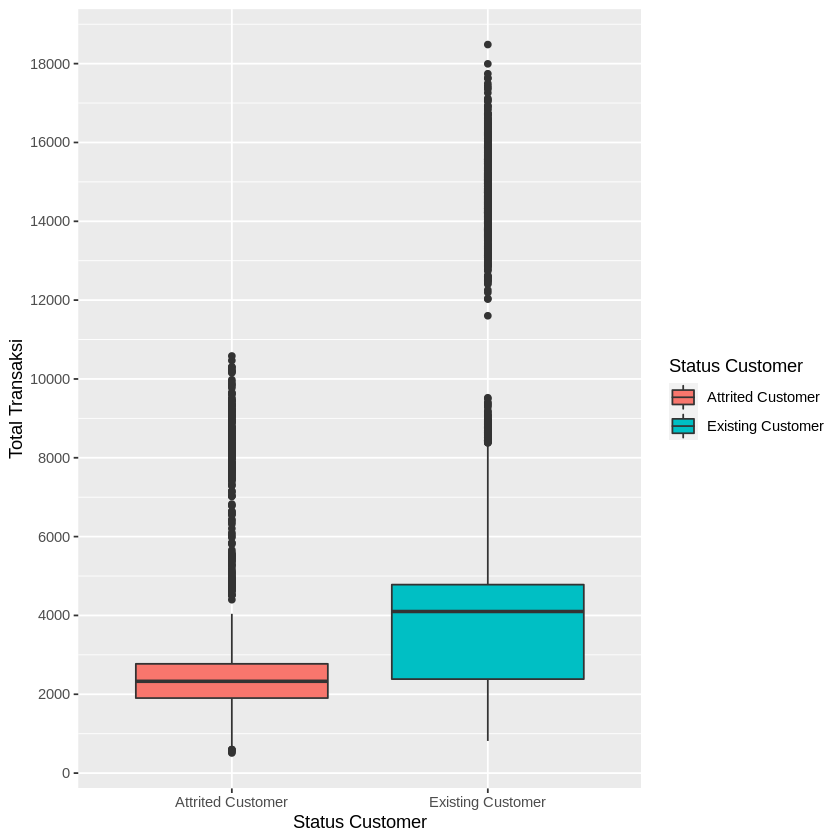

In [ ]:
# Membuat barplot 
ggplot(data = df, aes(x = Attrition_Flag, y = Total_Trans_Amt, fill=Attrition_Flag)) +
    geom_boxplot() +
    xlab("Status Customer") +
    scale_y_continuous(breaks = seq(0,20000,by=2000)) +
    labs(x="Status Customer", y="Total Transaksi", fill="Status Customer") 

In [ ]:
# Menampikan detail atribut total transaksi
summary(df$Total_Trans_Amt)
# Mencari korelasi dari atribut total transaksi dan status customer
cor.test(as.numeric(df$Attrition_Flag), df$Total_Trans_Amt)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    510    2156    3899    4404    4741   18484 


	Pearson's product-moment correlation

data:  as.numeric(df$Attrition_Flag) and df$Total_Trans_Amt
t = 17.211, df = 10125, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1496129 0.1874596
sample estimates:
      cor 
0.1685984 


> **Boxplot dan violinplot dari atribut total transaksi dan status customer**
>  
> Dari hasil analisa diatas, kita dapat melihat:
> 1. Rata-rata total banyak transaksi adalah **4404**, minimal adalah **510**, dan maksimal adalah **18484**
> 2. Banyak pencilan dari atribut total banyak transaksi
> 3. Nilai korelasi antara dua atribut adalah **0.16**
> 4. Nilai p-value lebih kecil dari 0.05, sehingga kita **menolak** *null hypothesis* bahwa atribut umur customer dan status customer tidak memiliki korelasi
> 
> **Kesimpulan**: Terdapat korelasi positif lemah antara kedua atribut

### Lama Customer Berlangganan dan Status Customer



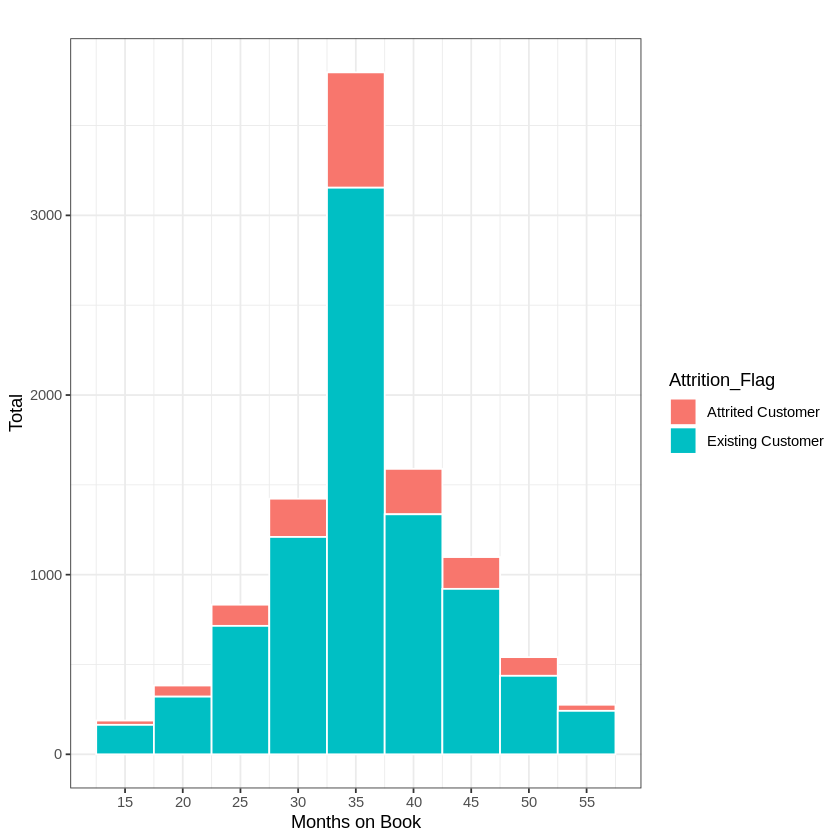

In [ ]:
ggplot(df, aes(x = Months_on_book)) +
  theme_bw() +
  geom_histogram(aes(fill = Attrition_Flag), binwidth = 5, col = "white") +
  scale_x_continuous(breaks = seq(0,60,by=5)) +
  labs(y = "Total",
       x = "Months on Book",
       title = "")

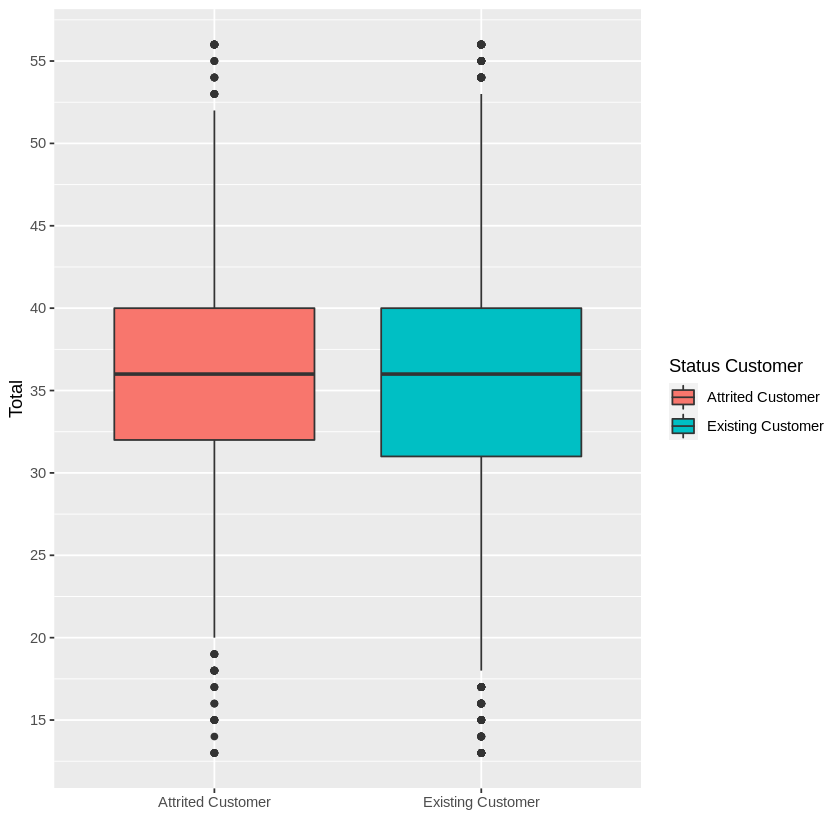

In [ ]:
# Membuat barplot 
ggplot(df, aes(x = Attrition_Flag, y = Months_on_book, fill = Attrition_Flag)) +
      geom_boxplot() +
      scale_y_continuous(breaks = seq(0,60,by=5)) +
      labs(x="", y="Total", fill="Status Customer")

In [ ]:
# Menampikan detail atribut lama customer berlangganan
summary(df$Months_on_book)
# Mencari korelasi dari atribut lama customer berlangganan dan status customer
cor.test(as.numeric(df$Attrition_Flag), df$Months_on_book)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13.00   31.00   36.00   35.93   40.00   56.00 


	Pearson's product-moment correlation

data:  as.numeric(df$Attrition_Flag) and df$Months_on_book
t = -1.3773, df = 10125, p-value = 0.1684
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.03315479  0.00579147
sample estimates:
        cor 
-0.01368685 


> **Histogram dan boxplot dari atribut lama customer berlangganan dan status customer**
>  
> Dari hasil analisa diatas, kita dapat melihat:
> 1. Rata-rata lama customer berlangganan adalah selama 35.93 bulan atau 2,9 tahun, minimal selama 13 bulan atau 1 tahun 1 bulan, dan maksimal selama 56 bulan atau 4,6 tahun *(continuous)*
> 2. Umur 40an hingga 50an adalah jumlah yang paling banyak berhenti berlangganan
> 3. Nilai korelasi antara dua atribut adalah -0.018
> 4. Nilai p-value lebih besar dari 0.05, sehingga kita gagal menolak *null hypothesis* bahwa atribut umur customer dan status customer tidak memiliki korelasi
> 
> **Kesimpulan**: Tidak terdapat korelasi antara kedua atribut

### Limit Kartu Kredit dan Status Customer

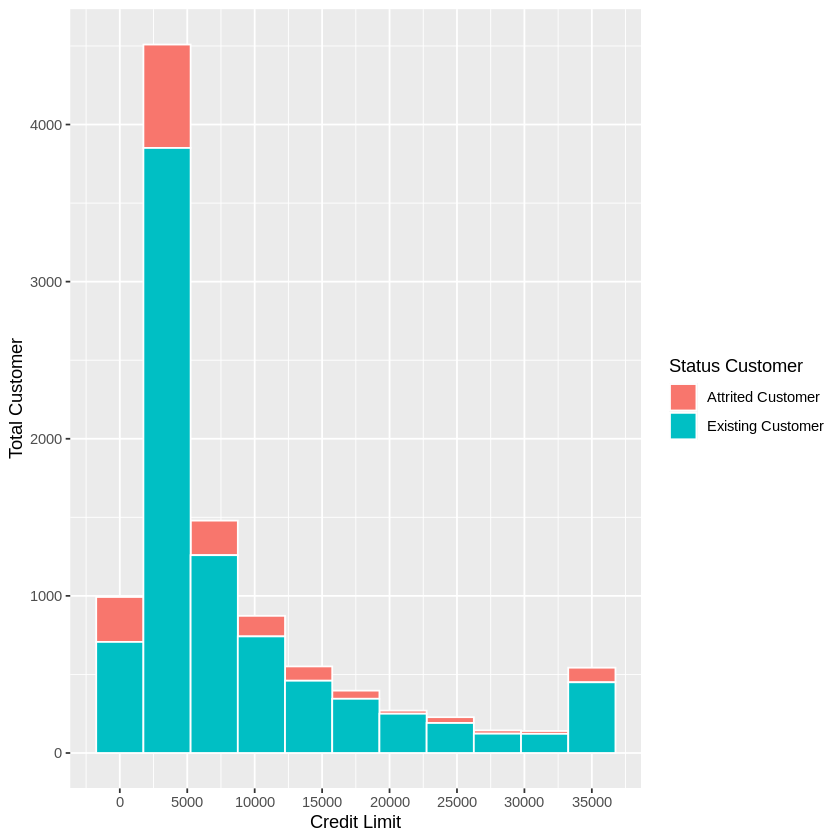

In [ ]:
# Membuat barplot 
ggplot(df, aes(x = Credit_Limit, fill = Attrition_Flag)) +
      geom_histogram(aes(fill = Attrition_Flag), binwidth = 3500, col = "white") +
      # scale_y_continuous(breaks = seq(0,35000,by=5000)) +
      scale_x_continuous(breaks = seq(0,35000,by=5000)) +
      labs(x="Credit Limit", y="Total Customer", fill="Status Customer")

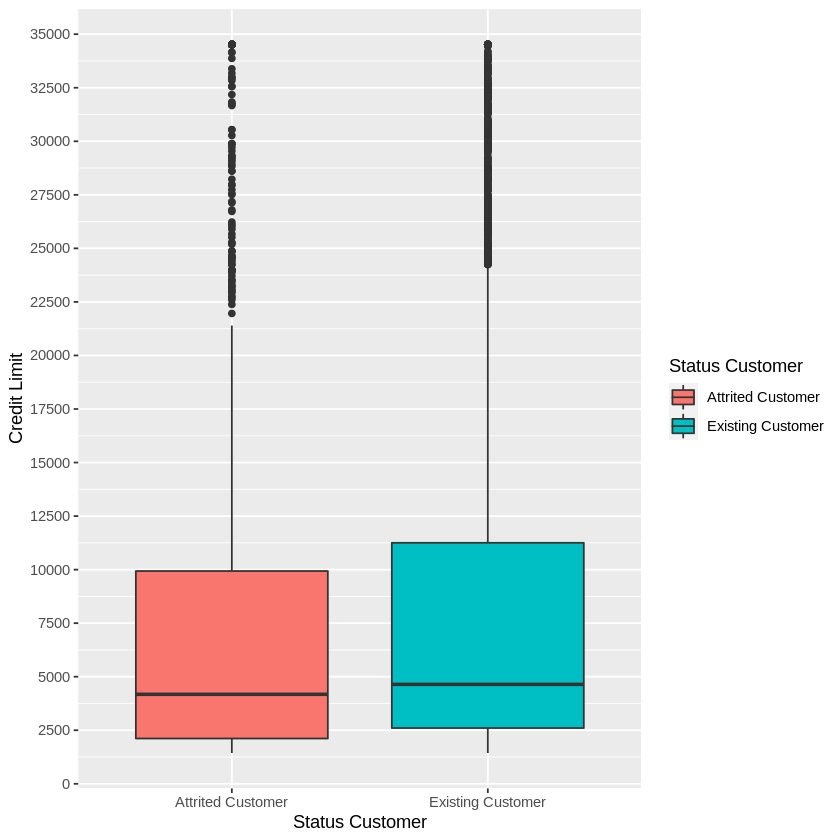

In [ ]:
ggplot(data = df, aes(x = Attrition_Flag, y = Credit_Limit, fill=Attrition_Flag)) +
    geom_boxplot() +
    # labs(x="Status Customer", y="Frekuensi", fill="Gender")
    xlab("Status Customer") +
    scale_y_continuous(breaks = seq(0,35000,by=2500)) +
    labs(x="Status Customer", y="Credit Limit", fill="Status Customer") 

In [ ]:
# Menampikan detail atribut 
summary(df$Credit_Limit)
# Mencari korelasi dari kedua atribut
cor.test(as.numeric(df$Attrition_Flag), df$Credit_Limit)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1438    2555    4549    8632   11068   34516 


	Pearson's product-moment correlation

data:  as.numeric(df$Attrition_Flag) and df$Credit_Limit
t = 2.4029, df = 10125, p-value = 0.01629
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.004398263 0.043329625
sample estimates:
       cor 
0.02387299 


> **Histogram dan boxplot dari atribut limit kartu kredit dan status customer**
>  
> Dari hasil analisa diatas, kita dapat melihat:
> 1. Rata-rata limit kredit customer adalah **8632**, minimal adalah **1438**, dan maximum adalah **34516**
> 2. Boxplot *existing customer* terhadap limit kredit cenderung lebih positif
> 3. Nilai korelasi antara dua atribut adalah 0.02
> 4. Nilai p-value lebih kecil dari 0.05, sehingga kita menolak *null hypothesis* bahwa atribut limit kredit dan status customer tidak memiliki korelasi
> 
> **Kesimpulan**: Terdapat korelasi positif lemah antara kedua atribut

### Tunggakan Customer dan Status Customer

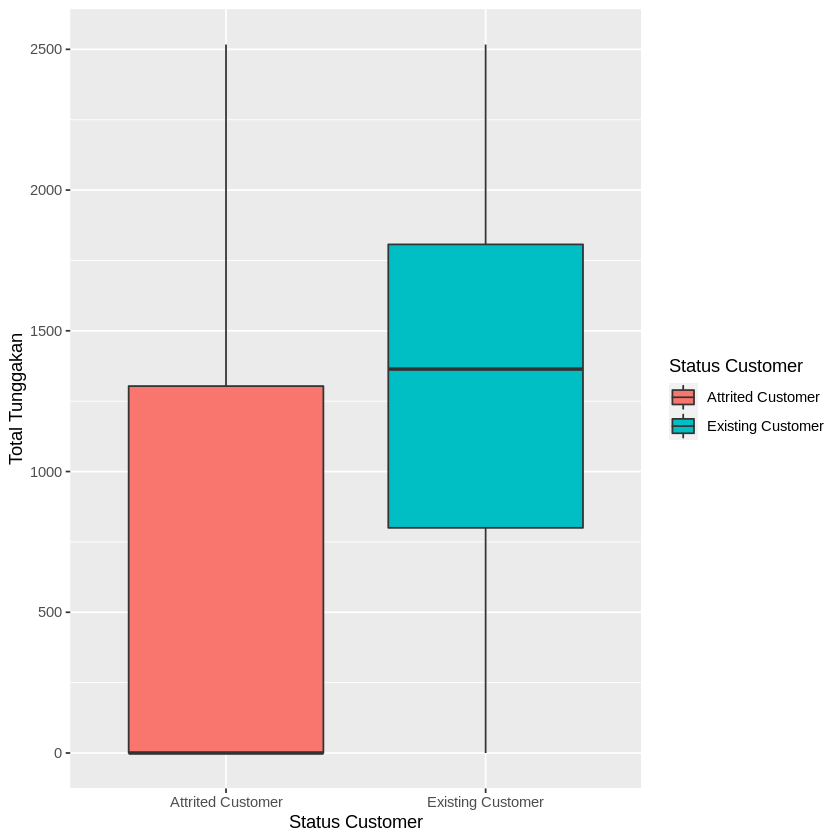

In [ ]:
ggplot(data = df, aes(x = Attrition_Flag, y = Total_Revolving_Bal, fill=Attrition_Flag)) +
      geom_boxplot() +
      xlab("Status Customer") +
      labs(x="Status Customer", y="Total Tunggakan", fill="Status Customer")

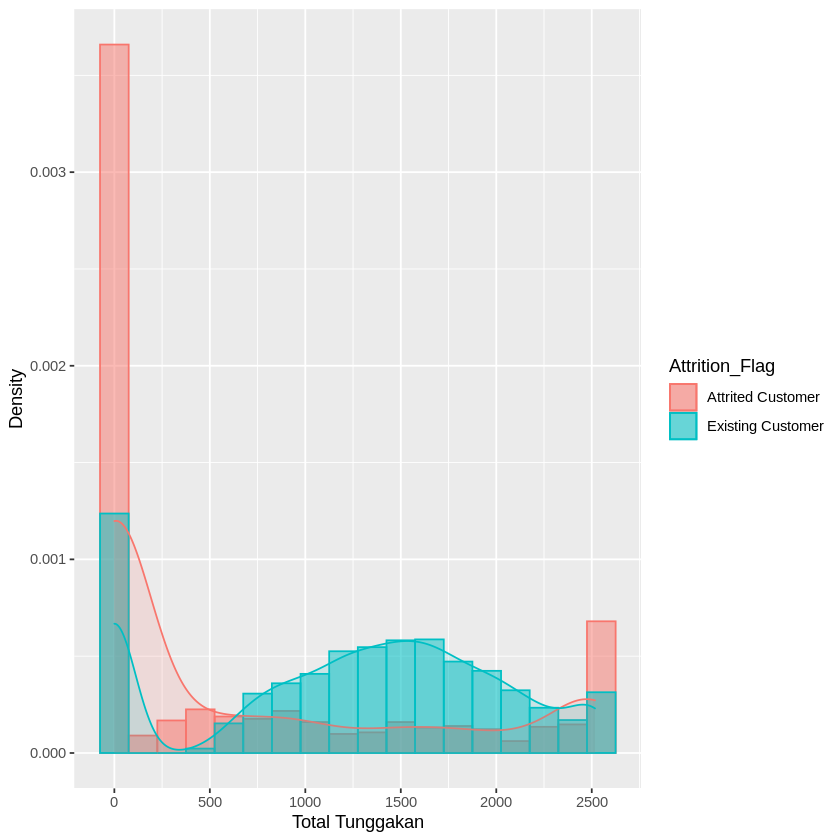

In [ ]:
ggplot(df, aes(x = Total_Revolving_Bal, color = Attrition_Flag, fill = Attrition_Flag)) +
  geom_histogram(aes(y=..density..), binwidth = 150 , alpha=0.5, 
                position="identity")+
                scale_x_continuous(breaks = seq(0,2500,by=500)) +
                labs(y="Density", x="Total Tunggakan") +
  geom_density(alpha = .15)

In [ ]:
# Menampikan detail atribut 
summary(df$Total_Revolving_Bal)
# Mencari korelasi dari kedua atribut
cor.test(as.numeric(df$Attrition_Flag), df$Total_Revolving_Bal)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0     359    1276    1163    1784    2517 


	Pearson's product-moment correlation

data:  as.numeric(df$Attrition_Flag) and df$Total_Revolving_Bal
t = 27.435, df = 10125, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2448305 0.2810895
sample estimates:
      cor 
0.2630529 


> **Histogram dan boxplot dari atribut total tunggakan dan status customer**
>  
> Dari hasil analisa diatas, kita dapat melihat:
> 1. Rata-rata tunggakan customer adalah **1163**, minimal **0**, dan maksimal **2517**
> 2. Untuk *existing customer* memiliki penyebaran total tunggakan cukup normal disekitar 1000-2000
> 3. Nilai korelasi antara dua atribut adalah 0.26
> 4. Nilai p-value lebih kecil dari 0.05, sehingga kita menolak *null hypothesis* bahwa atribut limit kredit dan status customer tidak memiliki korelasi
> 
> **Kesimpulan**: Terdapat korelasi positif lemah antara kedua atribut

### Total Transaksi Customer dan Status Customer

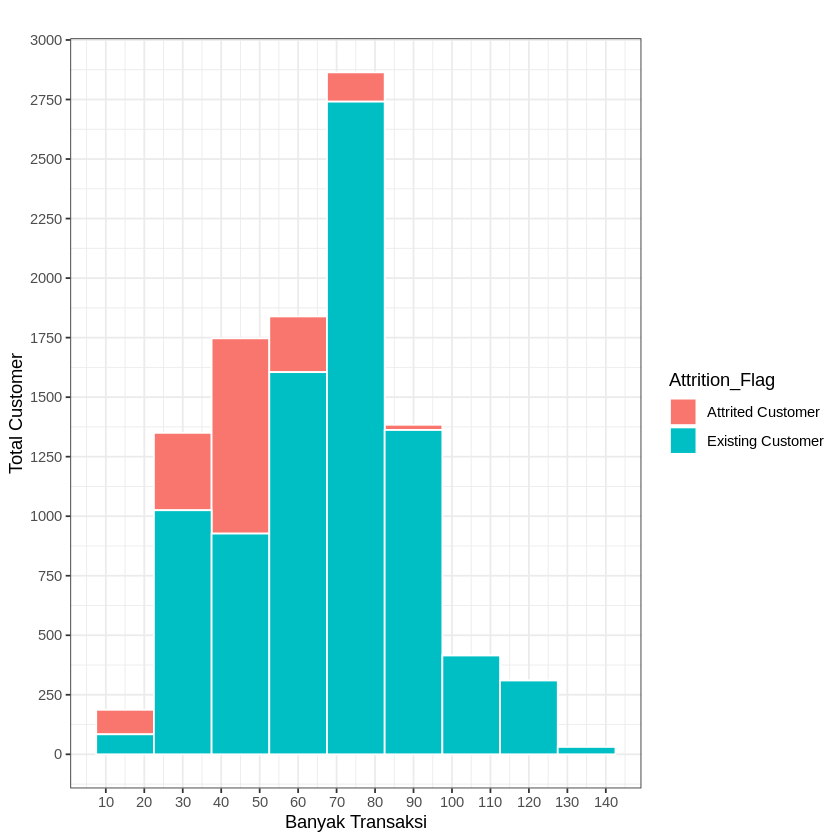

In [ ]:
ggplot(df, aes(x = Total_Trans_Ct)) +
  theme_bw() +
  geom_histogram(aes(fill = Attrition_Flag), binwidth = 15, col = "white") +
  labs(y = "Total Customer",
       x = "Banyak Transaksi",
       title = "") +
  scale_x_continuous(breaks = seq(0,150,by=10)) +
  scale_y_continuous(breaks = seq(0,3000,by=250))

# summary(df$Total_Trans_Ct)

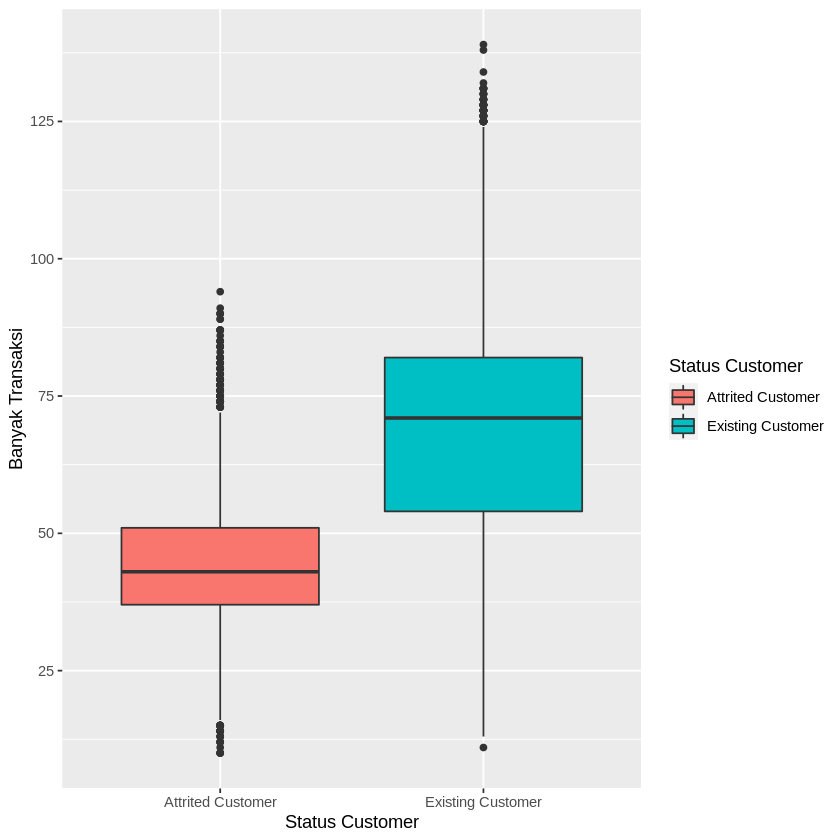

In [ ]:
ggplot(data = df, aes(x = Attrition_Flag, y = Total_Trans_Ct, fill=Attrition_Flag)) +
      geom_boxplot() +
      xlab("Status Customer") +
      scale_y_continuous(breaks = seq(0,150,by=25)) +
      labs(x="Status Customer", y="Banyak Transaksi", fill="Status Customer")

In [ ]:
# Menampikan detail atribut 
summary(df$Total_Trans_Ct)
# Mencari korelasi dari kedua atribut
cor.test(as.numeric(df$Attrition_Flag), df$Total_Trans_Ct)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.00   45.00   67.00   64.86   81.00  139.00 


	Pearson's product-moment correlation

data:  as.numeric(df$Attrition_Flag) and df$Total_Trans_Ct
t = 40.251, df = 10125, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3544902 0.3880723
sample estimates:
      cor 
0.3714027 


> **Histogram dan boxplot dari atribut total tunggakan dan status customer**
>  
> Dari hasil analisa diatas, kita dapat melihat:
> 1. Rata-rata banyak transaksi adalah **64.86 kali** per bulan, minimum **10 kali** per bulan, dan maksimum **139 kali** per bulan
> 2. Untuk *attrited customer* transaksi paling banyak adalah sekitar 40-50 kali transaksi
> 3. Nilai korelasi antara dua atribut adalah 0.37
> 4. Nilai p-value lebih kecil dari 0.05, sehingga kita menolak *null hypothesis* bahwa atribut limit kredit dan status customer tidak memiliki korelasi 
> 
> **Kesimpulan**: Terdapat korelasi positif lemah antara kedua atribut

### Heatmap 

In [ ]:
# Meng-import dan meng-assign dataset ke variabel "df"
df <- read.csv('https://raw.githubusercontent.com/hidayattaufiqur/Tubes-Statistika/main/BankChurners.csv')

In [ ]:
str(df)

'data.frame':	10127 obs. of  11 variables:
 $ Attrition_Flag     : Factor w/ 2 levels "Attrited Customer",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Customer_Age       : int  45 49 51 40 40 44 51 32 37 48 ...
 $ Gender             : Factor w/ 2 levels "F","M": 2 1 2 1 2 2 2 2 2 2 ...
 $ Education_Level    : Factor w/ 7 levels "College","Doctorate",..: 4 3 3 4 6 3 7 4 6 3 ...
 $ Marital_Status     : Factor w/ 4 levels "Divorced","Married",..: 2 3 2 4 2 2 2 4 3 3 ...
 $ Card_Category      : Factor w/ 4 levels "Blue","Gold",..: 1 1 1 1 1 1 2 4 1 1 ...
 $ Months_on_book     : int  39 44 36 34 21 36 46 27 36 36 ...
 $ Credit_Limit       : num  12691 8256 3418 3313 4716 ...
 $ Total_Revolving_Bal: int  777 864 0 2517 0 1247 2264 1396 2517 1677 ...
 $ Total_Trans_Amt    : int  1144 1291 1887 1171 816 1088 1330 1538 1350 1441 ...
 $ Total_Trans_Ct     : int  42 33 20 20 28 24 31 36 24 32 ...


In [ ]:
data <- df %>% mutate_if(is.factor, as.numeric)
res <- cor(data)
res <- round(res, 2)
melted_res <- melt(res)
# heatmap(res, scale="column", cexRow=1, cexCol=1,  labRow=paste("", rownames(res),sep=""), col= colorRampPalette(brewer.pal(8, "Blues"))(25))

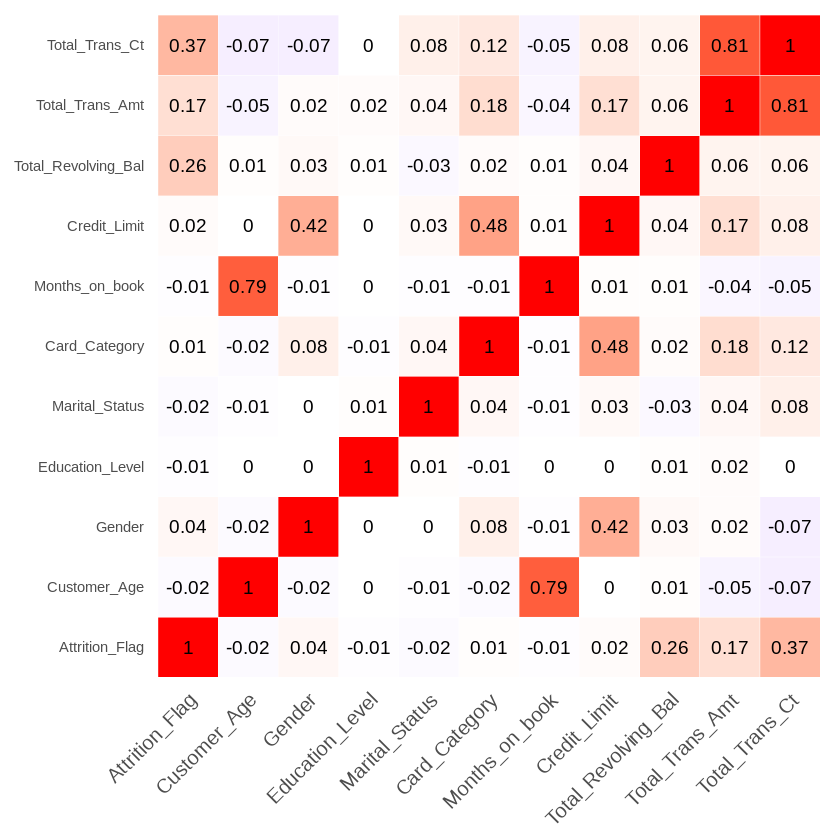

In [ ]:
ggheatmap <- ggplot(melted_res, aes(Var2, Var1, fill = value))+
 geom_tile(color = "white")+
 scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
   name="Pearson\nCorrelation") +
  theme_minimal()+ 
 theme(axis.text.x = element_text(angle = 45, vjust = 1, 
    size = 12, hjust = 1))+
 coord_fixed()
# Print the heatmap
ggheatmap + 
geom_text(aes(Var2, Var1, label = value), color = "black", size = 4) +
theme(
  axis.title.x = element_blank(),
  axis.title.y = element_blank(),
  panel.grid.major = element_blank(),
  panel.border = element_blank(),
  panel.background = element_blank(),
  axis.ticks = element_blank(),
  legend.justification = c(1, 0),
  legend.position = c(3.2, 0.9),
  legend.direction = "horizontal")
  # guides(fill = guide_colorbar(barwidth = 7, barheight = 1,
  #               title.position = "right", title.hjust = 0.5, title.vjust = ))


> **Heatmap dari semua atribut yang digunakan**
>  
> Dari hasil analisa diatas, kita dapat melihat:
> 1. Korelasi terkuat terdapat antara atribut **Total_Trans_Ct** dan **Total_Trans_Amt** dengan nilai korelasi **0.81** 
> 2. Korelasi terkuat terhadap atribut **attrition_flag** adalah dengan atribut **total_trans_ct** dengan nilai korelasi **0.37**
> 
> **Kesimpulan**: Terdapat korelasi positif lemah antara kedua atribut